In [1]:
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Python provides many bindings for machine learning libraries, some
specialized for technologies such as neural networks, and others
geared towards novice users. For our discussion, we focus on the
powerful and popular Scikit-learn module.  Scikit-learn is
distinguished by its consistent and sensible API, its wealth of
machine learning algorithms, its clear documentation, and its readily
available datasets that make it easy to follow along with the online
documentation. Like Pandas, Scikit-learn relies on Numpy for numerical
arrays. Since its release in 2007, Scikit-learn has become the most
widely-used, general-purpose, open-source machine learning modules
that is popular in both industry and academia.  As with all of the
Python modules we use, Scikit-learn is available on all the major
platforms.

To get started, let's revisit the familiar ground of linear regression using
Scikit-learn. First, let's create some data.

In [2]:
import numpy as np
from matplotlib.pylab import subplots
from sklearn.linear_model import LinearRegression
X = np.arange(10)         # create some data
Y = X+np.random.randn(10) # linear with noise

 We next import and create an instance of the `LinearRegression`
class from Scikit-learn.

In [3]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression() # create model

 Scikit-learn has a wonderfully consistent API. All
Scikit-learn objects use the `fit` method to compute model parameters
and the `predict` method to evaluate the model.  For the
`LinearRegression` instance, the `fit` method computes the
coefficients of the linear fit. This method requires a matrix of
inputs where the rows are the samples and the columns are the
features. The *target* of the regression are the `Y` values, which
must be correspondingly shaped, as in the following,

In [4]:
X,Y = X.reshape((-1,1)), Y.reshape((-1,1))
lr.fit(X,Y)
lr.coef_

array([[ 0.87941713]])

**Programming Tip.**

The negative one in the `reshape((-1,1))` call above is for the truly
lazy.  Using a negative one tells Numpy to figure out what that
dimension should be given the other dimension and number of array
elements.



 the `coef_` property of the linear regression object shows
the estimated parameters for the fit. The convention is to denote
estimated parameters with a trailing underscore. The model has a
`score` method that computes the $R^2$ value for the regression.
Recall from our statistics chapter  that the
$R^2$ value is an indicator of the quality of the fit and varies
between zero (bad fit) and one (perfect fit).

In [5]:
lr.score(X,Y)

0.91803888827923907

 Now, that we have this fitted, we can evaluate
the fit using the `predict` method,

In [6]:
xi = np.linspace(0,10,15) # more points to draw
xi = xi.reshape((-1,1)) # reshape as columns
yp = lr.predict(xi)

 The resulting fit is shown in [Figure](#fig:python_machine_learning_modules_002)

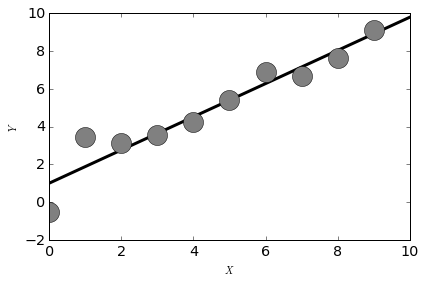

In [7]:
fig,ax=subplots()
_=ax.plot(xi,yp,'-k',lw=3)
_=ax.plot(X,Y,'o',ms=20,color='gray')
_=ax.tick_params(labelsize='x-large')
_=ax.set_xlabel('$X$')
_=ax.set_ylabel('$Y$')
fig.tight_layout()
#fig.savefig('fig-machine_learning/python_machine_learning_modules_002.pdf')

<!-- dom:FIGURE: [fig-machine_learning/python_machine_learning_modules_002.pdf, width=500 frac=0.75] The Scikit-learn module can easily perform basic linear regression. The circles show the *training* data and the fitted line is shown in black. <div id="fig:python_machine_learning_modules_002"></div> -->
<!-- begin figure -->
<div id="fig:python_machine_learning_modules_002"></div>

<p>The Scikit-learn module can easily perform basic linear regression. The circles show the <em>training</em> data and the fitted line is shown in black.</p>
<img src="fig-machine_learning/python_machine_learning_modules_002.pdf" width=500>

<!-- end figure -->



**Multilinear Regression.** The Scikit-learn module easily extends
linear regression to multiple dimensions.  For example, for
multi-linear regression,

$$
y = \alpha_0 + \alpha_1 x_1 + \alpha_2 x_2 + \ldots + \alpha_n x_n
$$

 The problem is to find all of the $\alpha$ terms given the
training set $\left\{x_1,x_2,\ldots,x_n,y\right\}$. We can create another
example data set and see how this works,

In [8]:
X=np.random.randint(20,size=(10,2))
Y=X.dot([1,3])+1 + np.random.randn(X.shape[0])*20

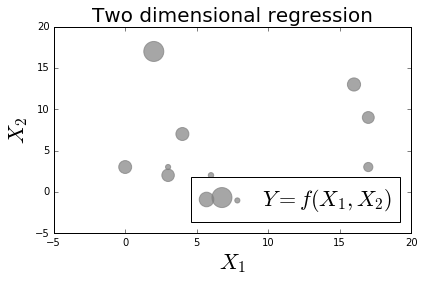

In [9]:
ym=Y/Y.max() # scale for marker size
fig,ax=subplots()
_=ax.scatter(X[:,0],X[:,1],ym*400,color='gray',alpha=.7,label=r'$Y=f(X_1,X_2)$')
_=ax.set_xlabel(r'$X_1$',fontsize=22)
_=ax.set_ylabel(r'$X_2$',fontsize=22)
_=ax.set_title('Two dimensional regression',fontsize=20)
_=ax.legend(loc=4,fontsize=22)
fig.tight_layout()
#fig.savefig('fig-machine_learning/python_machine_learning_modules_003.png')

<!-- dom:FIGURE: [fig-machine_learning/python_machine_learning_modules_003.png, width=500 frac=0.85] Scikit-learn can easily perform multi-linear regression. The size of the circles indicate the value of the two-dimensional function of $(X_1,X_2)$.  <div id="fig:python_machine_learning_modules_003"></div> -->
<!-- begin figure -->
<div id="fig:python_machine_learning_modules_003"></div>

<p>Scikit-learn can easily perform multi-linear regression. The size of the circles indicate the value of the two-dimensional function of $(X_1,X_2)$.</p>
<img src="fig-machine_learning/python_machine_learning_modules_003.png" width=500>

<!-- end figure -->


 [Figure](#fig:python_machine_learning_modules_003) shows the
two dimensional regression example, where the size of the circles is
proportional to the targetted $Y$ value.  Note that we salted the output
with random noise just to keep things interesting. Nonetheless, the
interface with Scikit-learn is the same,

In [10]:
lr=LinearRegression()
lr.fit(X,Y)
print lr.coef_

[-1.30302125  3.526391  ]


 Note that the `coef_` variable now has two terms in it,
corresponding to the two input dimensions. Note that the constant
offset is already built-in and is an option on the `LinearRegression`
constructor. [Figure](#fig:python_machine_learning_modules_004) shows
how the regression performs.

In [11]:
_=lr.fit(X,Y)
yp=lr.predict(X)
ypm=yp/yp.max() # scale for marker size
_=ax.scatter(X[:,0],X[:,1],ypm*400,marker='x',color='k',lw=2,alpha=.7,label=r'$\hat{Y}$')
_=ax.legend(loc=0,fontsize=22)
_=fig.canvas.draw()
#fig.savefig('fig-machine_learning/python_machine_learning_modules_004.png')

<!-- dom:FIGURE: [fig-machine_learning/python_machine_learning_modules_004.png, width=500 frac=0.85] The predicted data is plotted in black. It overlays the training data, indicating a good fit.  <div id="fig:python_machine_learning_modules_004"></div> -->
<!-- begin figure -->
<div id="fig:python_machine_learning_modules_004"></div>

<p>The predicted data is plotted in black. It overlays the training data, indicating a good fit.</p>
<img src="fig-machine_learning/python_machine_learning_modules_004.png" width=500>

<!-- end figure -->



**Polynomial Regression.** We can extend this to include polynomial
regression by using the `PolynomialFeatures` in the `preprocessing`
sub-module. To keep it simple, let's go back to our one-dimensional
example. First, let's create some synthetic data,

In [12]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(10).reshape(-1,1) # create some data
Y = X+X**2+X**3+ np.random.randn(*X.shape)*80

<!-- *f* -->

 Next, we have to create a transformation
from `X` to a polynomial of `X`,

In [13]:
qfit = PolynomialFeatures(degree=2) # quadratic
Xq = qfit.fit_transform(X)
print Xq

[[  1.   0.   0.]
 [  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]]


 Note there is an automatic constant term in the output $0^{th}$
column where `fit_transform` has mapped the single-column input into a set of
columns representing the individual polynomial terms.  The middle column has
the linear term, and the last has the quadratic term. With these polynomial
features stacked as columns of `Xq`, all we have to do is `fit` and `predict`
again. The following draws a comparison between the linear regression and the
quadratic repression,

In [14]:
lr=LinearRegression() # create linear model 
qr=LinearRegression() # create quadratic model 
lr.fit(X,Y)  # fit linear model
qr.fit(Xq,Y) # fit quadratic model
lp = lr.predict(xi)
qp = qr.predict(qfit.fit_transform(xi))

<!-- dom:FIGURE: [fig-machine_learning/python_machine_learning_modules_005.png, width=500 frac=0.85] The title shows the $R^2$ score for the linear and quadratic rogressions. <div id="fig:python_machine_learning_modules_005"></div> -->
<!-- begin figure -->
<div id="fig:python_machine_learning_modules_005"></div>

<p>The title shows the $R^2$ score for the linear and quadratic rogressions.</p>
<img src="fig-machine_learning/python_machine_learning_modules_005.png" width=500>

<!-- end figure -->

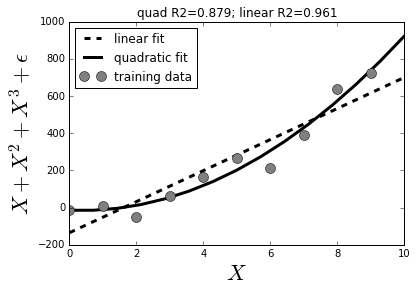

In [15]:
fig,ax=subplots()
_=ax.plot(xi,lp,'--k',lw=3,label='linear fit')
_=ax.plot(xi,qp,'-k',lw=3,label='quadratic fit')
_=ax.plot(X.flat,Y.flat,'o',color='gray',ms=10,label='training data')
_=ax.legend(loc=0)
_=ax.set_title('quad R2={:.3}; linear R2={:.3}'.format(lr.score(X,Y),qr.score(Xq,Y)))
_=ax.set_xlabel('$X$',fontsize=22)
_=ax.set_ylabel(r'$X+X^2+X^3+\epsilon$',fontsize=22)
#fig.savefig('fig-machine_learning/python_machine_learning_modules_005.png')

This just scratches the surface of Scikit-learn. We will go through
many more examples later, but the main thing is to concentrate on the
usage (i.e., `fit`, `predict`) which is standardized across all of the
machine learning methods that are implemented in Scikit-learn.